<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S7_intro_ML/S7-SimpleDemo_Telco_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 7: Introduction to ML - Classification

## Step-by-step simple demo based on Classification on Customer Churn Dataset

Classification using customer service churn dataset (https://www.kaggle.com/blastchar/telco-customer-churn). This dataset has been preprocessed to create dummy variables. We will only use part of the variables and datapoints in this example. **This simple demo shows a step-by-step analysis of a sliced dataset which can be easily reviewed with detailed markdown comments for this case.** For the full-scale run, you can modify the code to allow the models to train on the full dataset.

In this first step, we will load sklearn library, which is a common library used in machine learning. Please see: https://scikit-learn.org/stable/getting_started.html for reference. The code "sklearn.__version__" simply shows the version of sklearn we are using.

In [1]:
import sklearn
from sklearn import *
sklearn.__version__

'0.22.2.post1'

### **Block 1**: data input

First, we will load the data input which is in the csv format. This data input is available on the URL indicated in the codes (there is no need to download it to your machine but you can follow the link to download it if you want to). We will print out the first 5 rows to review. 

In this dataset, the first column is the ID of the customer whereas the subsequent columns, except the last one, describe the input data which are associated with each customer (e.g., for the first customer, he is not a *SeniorCitizen*, has a *tenure* of 1 month, and his *MonthlyCharges* is $29.85, etc.). The last column is the label indicating if his customer has not churned (*Churn_Yes* = 0).

In [2]:
import pandas as pd
# Load transformed dataset
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S7_intro_ML/data/Telco-Customer-Churn_dummies.csv'
customer_data = pd.read_csv(url)
customer_data

,ID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,2,0,2,53.85,108.15,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,3,0,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,24,84.80,1990.50,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,0,1,0
7028,7039,0,72,103.20,7362.90,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0
7029,7040,0,11,29.60,346.45,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
7030,7041,1,4,74.40,306.60,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1


For simplicity, we will cut only the first 20 customer IDs for our demo. This is only for the sake of presentation and you should run the analysis in the full dataset in practice.

In [3]:
customer_data = customer_data.loc[:20]
customer_data

,ID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,2,0,2,53.85,108.15,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,3,0,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
5,5,0,8,99.65,820.50,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1
6,6,0,22,89.10,1949.40,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
7,7,0,10,29.75,301.90,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8,8,0,28,104.80,3046.05,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1
9,9,0,62,56.15,3487.95,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


### **Block 2**: Feature preparation

This block is supposed to be for feature engineering. Since all the features are already prepared and are in numerical format, we will not do the feature engineering/transformation here. We will only take 3 input variables to be used in our model in this case (see "selected_features" below).

The input variables are then assigned to *X* and the target variable (column 'Churn_Yes') is then assigned to *y*.

In [4]:
selected_features = ['tenure', 'TotalCharges', 'InternetService_Fiber optic']
print(selected_features)
X = customer_data[selected_features]
y = customer_data['Churn_Yes']

print("Input variables (X):\n"+str(X))
print("Predicted variable (y):"+str(y))

['tenure', 'TotalCharges', 'InternetService_Fiber optic']
Input variables (X):
    tenure  TotalCharges  InternetService_Fiber optic
0        1         29.85                            0
1       34       1889.50                            0
2        2        108.15                            0
3       45       1840.75                            0
4        2        151.65                            1
5        8        820.50                            1
6       22       1949.40                            1
7       10        301.90                            0
8       28       3046.05                            1
9       62       3487.95                            0
10      13        587.45                            0
11      16        326.80                            0
12      58       5681.10                            1
13      49       5036.30                            1
14      25       2686.05                            1
15      69       7895.15                            1
16 

You can see from the above results that the first data point "[1.00000e+00 2.98500e+01 0.00000e+00]" corresponds to the first customer (ID 0), and the second one corresponds to the second customer and so on. The first predicted value is the 'label' which corresponds to the first data point and indicates that the first customer did not churn (y = 0). There are 20 data points in total (since we take only the first 20 data points).

### Splitting data for training and testing process ###

Since we want to measure the performance of the model for prediction task, we must perform a cross-validation process in order to evaluate how the model performs on the data it has not seen in the training (or model parameter fitting) process. This will allow us to see how the model would perform once we use it in prediction which predicts the results based on the new data points where the labels (prediced values) are still not available.

The codes below will randomly split the data into 75% for training and 25% in testing. We also print out the split data to review which data points below to the training set, and which data points belong to the testing set.

In order to do this, we use sklearn function *model_selection.train_test_split(X, y)* (see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which takes the input data X and label y. Since this function will split the data points randomly, we also indicate "random_state=0" so that we can reproduce the same result (in practice, this would not be necessary).

In [5]:
# Split into training and testing data (75/25 by default)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

print(X_train)
print(X_test)

    tenure  TotalCharges  InternetService_Fiber optic
14      25       2686.05                            1
18      10        528.35                            0
6       22       1949.40                            1
19      21       1862.90                            1
4        2        151.65                            1
2        2        108.15                            0
5        8        820.50                            1
16      52       1022.95                            0
9       62       3487.95                            0
7       10        301.90                            0
17      71       7382.25                            1
3       45       1840.75                            0
0        1         29.85                            0
15      69       7895.15                            1
12      58       5681.10                            1
    tenure  TotalCharges  InternetService_Fiber optic
8       28       3046.05                            1
13      49       5036.30    

In [6]:
# Here is the training set:
print("Number of data points in training set: "+str(len(y_train)))
print("Training X:\n"+str(X_train))
print("Training y:"+str(y_train))

Number of data points in training set: 15
Training X:
    tenure  TotalCharges  InternetService_Fiber optic
14      25       2686.05                            1
18      10        528.35                            0
6       22       1949.40                            1
19      21       1862.90                            1
4        2        151.65                            1
2        2        108.15                            0
5        8        820.50                            1
16      52       1022.95                            0
9       62       3487.95                            0
7       10        301.90                            0
17      71       7382.25                            1
3       45       1840.75                            0
0        1         29.85                            0
15      69       7895.15                            1
12      58       5681.10                            1
Training y:14    0
18    1
6     0
19    0
4     1
2     1
5     1
16    0
9     0

In [7]:
# Here is the testing set:
print("Number of data points in testing set: "+str(len(y_test)))
print("Testing X:\n"+str(X_test))
print("Testing y:"+str(y_test))

Number of data points in testing set: 6
Testing X:
    tenure  TotalCharges  InternetService_Fiber optic
8       28       3046.05                            1
13      49       5036.30                            1
20       1         39.65                            0
1       34       1889.50                            0
11      16        326.80                            0
10      13        587.45                            0
Testing y:8     1
13    1
20    1
1     0
11    0
10    0
Name: Churn_Yes, dtype: int64


### **Block 3**: Model

In this block, we will choose the models to be used for prediction. Only the training set will be used in this step (and the testing set will be used in cross-validation). We will consider two models, i.e., logistic regression and decision tree.

### 3.1 Logistic regression model

Here we will prepare the object of the model by calling the function which corresponds to the model we choose. You can simply call the code below *sklearn.linear_model.LogisticRegression()* to create an object of logistic regression which we name as *logreg*

See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for more information about this function.

In [8]:
logreg = sklearn.linear_model.LogisticRegression()

### 3.2 Classification tree model

Now we also prepare an object for classification tree using *sklearn.tree.DecisionTreeClassifier()* to create an object of logistic regression which we name as *tree*. Note that the algorithm uses a random initialization so we also put *random_state=0* to ensure that we can reproduce the result.

See https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html for more information about this function.

In [9]:
tree = sklearn.tree.DecisionTreeClassifier(random_state=0)

### Running ML algorithm to fit the model

Now we need to fit the models (both logistic regression and classification tree) by using the training dataset. This step can be done by calling the method *model_object.fit(X,y)* on the object of the model we already created. The model will estimate the parameters from the input variables X and label y in the training set (75% of data points).

First we train the logistic regression model using the training set. We also print out the accuracy level from the model for the training set to see how the model performs in this training set (note: this is NOT cross-validation).

The method *model_object.score(X, y)* will take the data input X to perform a prediction (or estimation) and then it will compare the result of the preduction to the known label *y*. You can review the documentation of the model (the links under 3.1 and 3.2) for more information about the methods fit(), score(), and other methods of the model.

In [10]:
# Train Logistic regression
logreg.fit(X_train, y_train)
print("Logistic Regression: Training accuracy: {:.3f}".format(logreg.score(X_train, y_train)))

Logistic Regression: Training accuracy: 0.867


The results indicated the accuracy on this set = 86.7%.

If you want to see the predicted result for each customer (in the training set), you can call the method *predict()* and compare it with the labels to see which customers (again, in the training set) were predicted correctly.

In [11]:
print("Predicted X_train:\n"+str(logreg.predict(X_train)))
print("Actual y_train:\n"+str(y_train.values))

Predicted X_train:
[0 0 0 0 1 1 1 0 0 0 0 0 1 0 0]
Actual y_train:
[0 1 0 0 1 1 1 0 0 0 0 0 0 0 0]


We do the same for classification tree.

In [12]:
# Train classification tree
tree.fit(X_train, y_train)
print("Classification tree: Training accuracy: {:.3f}".format(tree.score(X_train, y_train)))

print("Predicted X_train:\n"+str(tree.predict(X_train)))
print("Actual y_train:\n"+str(y_train.values))

Classification tree: Training accuracy: 1.000
Predicted X_train:
[0 1 0 0 1 1 1 0 0 0 0 0 0 0 0]
Actual y_train:
[0 1 0 0 1 1 1 0 0 0 0 0 0 0 0]


### **Block 4**: Validation

Now we have trained the two models using the training sets. The cross-validation is the key step to evaluate if the models will still perform well on the data points they haven't seen before. In order to do this, we can simply call the *score()* method but using the test set instead of the training set. In addition, we also calculate precision and recall. The details of *score()*,* precision()* and *recall()* methods are in the corresponding documentation page of the model.

In [13]:
# Measure the out-of-sample performance of the logistic regression model

y_predict = logreg.predict(X_test)
print("Logistic Regression:")
print("   Predicted X_train:"+str(y_predict))
print("   Actual y_train:"+str(y_test.values))
print("   Testing accuracy: {:.3f}".format(logreg.score(X_test, y_test)))
print("   Precision score: {:.3f}".format(sklearn.metrics.precision_score(y_test, y_predict)))
print("   Recall score: {:.3f}".format(sklearn.metrics.recall_score(y_test, y_predict)))

Logistic Regression:
   Predicted X_train:[0 0 1 0 0 0]
   Actual y_train:[1 1 1 0 0 0]
   Testing accuracy: 0.667
   Precision score: 1.000
   Recall score: 0.333


You can see that the model does not generalize well when testing against the data is hasn't seen before. The testing accuracy is 66.7% whereas recall is only 33.3%.

Now we test the classification tree model.

In [14]:
y_predict = tree.predict(X_test)
print("Classification Tree:")
print("   Predicted X_train:"+str(y_predict))
print("   Actual y_train:"+str(y_test.values))
print("   Testing accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("   Precision score: {:.3f}".format(sklearn.metrics.precision_score(y_test, y_predict)))
print("   Recall score: {:.3f}".format(sklearn.metrics.recall_score(y_test, y_predict)))

Classification Tree:
   Predicted X_train:[0 0 0 0 0 1]
   Actual y_train:[1 1 1 0 0 0]
   Testing accuracy: 0.333
   Precision score: 0.000
   Recall score: 0.000


which gives even worse results, and only 33.3% of accuracy is achieved. However, please keep in mind that this model was trained and tested on very small data set. You can run Demo 3 to review the results on the full data set.

### Getting the insights in the models.

The logistic regression model can provide you the coefficeints of the linear function of the fitted model. You can obtain those attributes from the trained model (object). This is also described in the documentation page of the model. The codes below show how such outputs can be obtained.

In [15]:
# Obtain the coefficients of the logistic regression model
print("intercept"+str(logreg.intercept_))
print("coefficients:"+str(logreg.coef_))

intercept[1.61349632]
coefficients:[[-0.23916044  0.00054421  0.29943228]]


For the classification tree model, the main output is *feature_importances_* which indicate the relative importance score of each feature used in the model. We can explore feature importance using the codes below.

In [16]:
print("List of features: "+ str(selected_features))
print("Feature importance: "+ str(tree.feature_importances_))

List of features: ['tenure', 'TotalCharges', 'InternetService_Fiber optic']
Feature importance: [0.28409091 0.71590909 0.        ]


We can also vitualize the classification tree using the codes below (note: the *max_depth* parameter will control the size of the displayed tree. We would not be able to visualize a very big tree so you can change the depth to display only a certain number of layers of the tree).

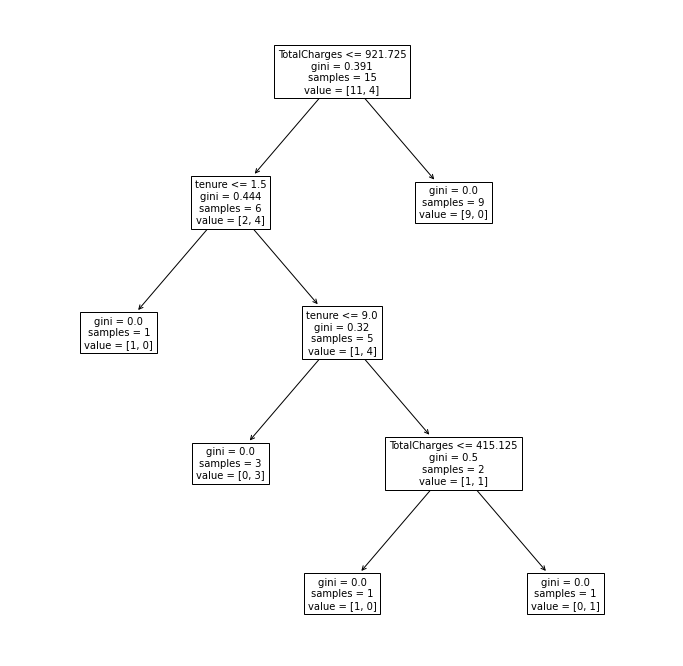

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(tree, feature_names=selected_features, fontsize=10, max_depth=4)
plt.show()

### Precision-recall curve

Since logistic regression uses a threshold (by default = 0.5) to indicate if the predicted probability implies the label 1 (when probability >= 0.5) or label 0 (when probability < 0.5). Changing this threshold will also change the result. In particular, when we lower the probability, the model will predict more positive case (label = 1) and thus this will increase the recall score (as we successfully capture more positive labels). However, at the same time, we will generally lower the precision score (as more false positive can occur). 


You can obtain the probabilities associated with each label (0 or 1) for each data point by calling the function `.predict_proba(X)` [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba). The precision-recall curve will show the trade-off between these two measures. For more information on the plot of the precision-recall curve, you can review https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html. The output `thresholds` provides the set of new different thesholds of the probability used to determine the positive level.

The codes below provide the plot for the precision-recall of the logistic regression model. I would encourage you to try it on the full data set to better see the results.

,Threshold,Precision,Recall
0,0.000000,0.500000,1.000000
1,0.000854,0.400000,0.666667
2,0.004112,0.500000,0.666667
3,0.042053,0.333333,0.333333
4,0.115554,0.500000,0.333333
5,0.235792,1.000000,0.333333
6,0.801535,1.000000,0.000000


Text(0.5, 1.0, 'Average precision score: AP=0.67')

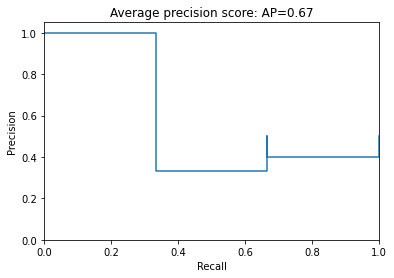

In [34]:
import matplotlib.pyplot as plt

# obtain the probability associated with label 1
# since predict_proba return the probabilities for both classes, 
# we only take the second one (probability for label 1) by adding [:, 1] to slice them 
y_prob = logreg.predict_proba(X_test)[:, 1] # use this for logistic regression
# y_prob = tree.predict_proba(X_test)[:, 1] # use this for tree (the result on the test is bad for this one)


precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_prob)
pred_recal_df = pd.DataFrame()
pred_recal_df['Threshold'] = [0] + list(thresholds) # the first threshold is zero but we need to add manually
pred_recal_df['Precision'] = precision
pred_recal_df['Recall'] = recall
display(pred_recal_df)

plt.figure()
plt.step(recall, precision)
average_precision = sklearn.metrics.average_precision_score(y_test, y_prob)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score: AP={0:0.2f}'.format(average_precision))